# Symbolic solutions of InferNet examples

Using SymPy's Stats module.

Examples from [here](http://infernet.azurewebsites.net/docs/Two%20coins%20tutorial.aspx).

In [3]:
from sympy import *
init_session()

from sympy.stats import P, E, variance, Die, Normal
from sympy import Eq, simplify
import sympy.stats
import numpy as np


IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


# Two coins

> Here, bothHeads is true only if both firstCoin and secondCoin are true and hence it represents the situation where both coins turn up heads.  We have not directly given bothHeads a prior distribution, yet it is a random variable, because it is a function of random variables.  So, we can ask the question "what is the distribution of this random variable?".  To answer this question, we need to perform inference. 

In [16]:
oneHalf=Rational(1,2)             # 1/2 is a float
firstCoin = sympy.stats.Bernoulli("firstCoin",p=oneHalf)
secondCoin = sympy.stats.Bernoulli("secondCoin",p=oneHalf)

In [17]:
# We use product instead of "logical and". "and" doesn't give the expected result, "&&" is not supported.
bothHeads = firstCoin * secondCoin

## Probability that both coins are heads: Bernoulli(0.25)

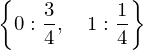

In [35]:
sympy.stats.density(bothHeads)

## Inference

If we observed that `bothHeads` is false, what is the probability that `firstCoin` was true?

In [36]:
# Note that a simple "==" doesn't give the expected result.
P( Eq(firstCoin,1), Eq(bothHeads,0) )

# Truncated Gaussian
In all its symbolic glory.

In [41]:
x=Normal("x",0,1)
thr = oneHalf

In [46]:
xp_m=E(x, x>thr)
xp_v=variance(x, x>thr)

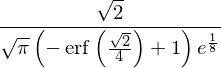

In [51]:
simplify(xp_m)
# Variance is also there, but more complex

In [48]:
print(N(xp_m))
print(N(xp_v))

1.14107777036806
0.268480407155879


In [102]:
# This works, but very slowly. It redoes the symbolic integration every time.
# E(x,x>thr) does not seem to be supported for symbolic thr
#
#for thr in np.arange(0,1,.1):
#    print("thr={:.1f} => mean={:.4f}, var={:.4f}".format(thr,
#                                                  E(x,x>thr).evalf(),
#                                                  variance(x,x>thr).evalf()  ))


thr=0.0 => mean=0.7979, var=0.3634


KeyboardInterrupt: 

In [101]:
# Using numsamples is not a good strategy either. Convergence is slow.
# for thr in np.arange(0,1,.1):
#    print("thr={:.1f} => mean={:.4f}, var={:.4f}".format(thr,
#                                                  E(x,x>thr,numsamples=1e3),
#                                                  variance(x,x>thr,numsamples=1e3)))


In [103]:
# Not sure why this does not work
E_trunc_gaussian=E(x,x>t)

NotImplementedError: sorting of these roots is not supported

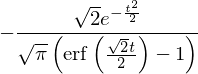

In [110]:
# Actually could have used sympy.stats.cdf
E_trunc_gaussian = simplify(integrate(y*sympy.stats.density(x)(y),(y,t,oo)) / 
                            integrate(sympy.stats.density(x)(y),(y,t,oo)))

E_trunc_gaussian

In [95]:
# Var[x]^2 = E[x^2] - E[x]^2
Ey2_trunc_gaussian = integrate(y**2 *sympy.stats.density(x)(y),(y,t,oo)) / integrate(sympy.stats.density(x)(y),(y,t,oo))
var_trunc_gaussian = simplify(Ey2_trunc_gaussian - E_trunc_gaussian**2 )

var_trunc_gaussian

In [100]:
# Beat this.  
for thr in np.arange(0,1.05,.1):
        print("thr={:.1f} => mean={:.4f}, var={:.4f}".format(thr,
                                                  E_trunc_gaussian.subs(t,thr).evalf(),
                                                  var_trunc_gaussian.subs(t,thr).evalf() ))

thr=0.0 => mean=0.7979, var=0.3634
thr=0.1 => mean=0.8626, var=0.3422
thr=0.2 => mean=0.9294, var=0.3221
thr=0.3 => mean=0.9982, var=0.3031
thr=0.4 => mean=1.0688, var=0.2853
thr=0.5 => mean=1.1411, var=0.2685
thr=0.6 => mean=1.2150, var=0.2527
thr=0.7 => mean=1.2905, var=0.2380
thr=0.8 => mean=1.3674, var=0.2241
thr=0.9 => mean=1.4456, var=0.2112
thr=1.0 => mean=1.5251, var=0.1991


In [96]:
?np.arange

In [99]:
E_trunc_gaussian.subs(t,thr).evalf()

In [104]:
P(x)

ValueError: x is not a relational or combination of relationals

In [112]:
tmp=sympy.stats.cdf(x)(z)

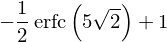

In [120]:
tmp.subs(z,10)